In [2]:
import numpy as np
from numpy.random import randn, uniform
import matplotlib.pyplot as plt

D = 2 # Dimension of the weight space
N_Data_1 = 15 # Number of samples in dataset 1
N_Data_2 = 30 # Number of samples in dataset 2
sigma_w = 2.0
prior_mean = [-5, 0]
prior_precision = np.eye(D) / sigma_w**2
# We summarize distributions using their parameters
prior_par = {'mean': prior_mean, 'precision': prior_precision}
# Here we draw the true underlying w. We do this only once
w_tilde = sigma_w * randn(2) + prior_mean
# Draw the inputs for datasets 1 and 2
X_Data_1 = 0.5 * randn(N_Data_1, D)
X_Data_2 = 0.1 * randn(N_Data_2, D) + 0.5
# Draw the outputs for the datasets
sigma_y = 1.0
y_Data_1 = np.dot(X_Data_1, w_tilde) + sigma_y * randn(N_Data_1)
y_Data_2 = np.dot(X_Data_2, w_tilde) + sigma_y * randn(N_Data_2)
# The complete datasets
Data_1 = {'X': X_Data_1,
          'y': y_Data_1}
Data_2 = {'X': X_Data_2,
          'y': y_Data_2}

In [3]:
def posterior_par(prior_par, Data, sigma_y):
    """Calculate posterior parameters.

    Calculate posterior mean and covariance for given prior mean and
    covariance in the par dictionary, given data and given noise
    standard deviation.
    """
    X = Data['X']
    y = Data['y']
    var_y = sigma_y**2
    w_0 = prior_par['mean']
    K_0 = prior_par['precision']
    K_N = K_0 + 1/var_y*np.transpose(X)@X
    w_N = np.linalg.solve(K_N, K_0)@w_0 
    if y.size > 0:
        w_N += 1/var_y*np.linalg.solve(K_N, np.transpose(X))@y
    return {'mean': w_N, 'precision': K_N}

In [4]:
print(posterior_par(prior_par, Data_2, sigma_y))

{'mean': array([-9.83288758, -2.12153199]), 'precision': array([[8.11367364, 7.56722265],
       [7.56722265, 8.15489618]])}


In [5]:
def visualize_2D_gaussian(par, label, colour, N=400):
    """
    Visualize the Gaussian by drawing 400 samples from 
    the distribution and showing the samples in a 2D scatter plot
    """
    samples = np.random.multivariate_normal(par['mean'], np.linalg.inv(par['precision']), N)
    plt.scatter(samples[:,0], samples[:,1], s=1, label=label, c=colour)
    plt.plot(par['mean'][0], par['mean'][1], marker='X', c='k')
    plt.xlim([-10,0])
    plt.ylim([-5,5])
    plt.xlabel('$w_1$')
    plt.ylabel('$w_2$')


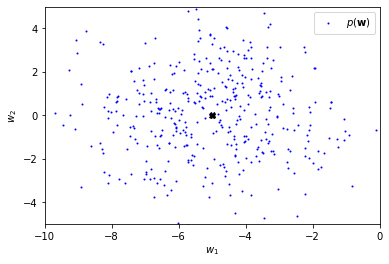

In [6]:
# Question 2 part c)
visualize_2D_gaussian(prior_par, label='$p(\mathbf{w})$', colour='b')
plt.legend()
plt.show()

In [7]:
def multivariate_gaussian_subplot(mean, cov, ax, pos, N=400):
    xx = np.random.multivariate_normal(mean, cov, size=(N,2))
    ax[pos].scatter(xx[:,0], xx[:,1], s=3)
    ax[pos].scatter(mean[0], mean[1], marker="x", s=20)
    ax[pos]

In [8]:
def get_inverse(X):
    if (X.shape[0] == X.shape[1]):
        return np.linalg.solve(X, np.eye(X.shape[0]))
    raise ValueError(f'Matrix {X} has no inverse!')

NameError: name 'posterior_par_1' is not defined

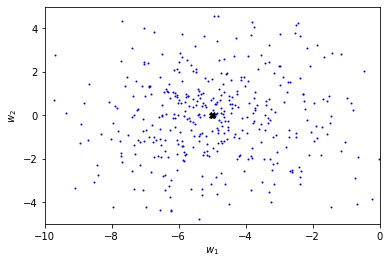

In [9]:
# Question 2 part d)
# fig, ax = plt.subplots(2,2, figsize=(10,10))
all_data = {'X': np.concatenate((Data_1['X'], Data_2['X'])), 'y': np.concatenate((Data_1['y'], Data_2['y']))}
post_par_data_1 = posterior_par(prior_par, Data_1, sigma_y)
post_par_data_2 = posterior_par(prior_par, Data_2, sigma_y)
post_par_data_1_2 = posterior_par(prior_par, all_data, sigma_y)

plt.figure(2)
plt.clf()
visualize_2D_gaussian(prior_par,
              label='$p(\mathbf{w})$',
              colour='b')
visualize_2D_gaussian(posterior_par_1,
              label='$p(\mathbf{w}|\mathcal{D}_1)$',
              colour='r')
visualize_2D_gaussian(posterior_par_2,
              label='$p(\mathbf{w}|\mathcal{D}_2)$',
              colour='g')
visualize_2D_gaussian(posterior_par_1_2,
              label='$p(\mathbf{w}|\mathcal{D}_1,\mathcal{D}_2)$',
              colour='y')
plt.legend()
plt.show()

# precision_data_1 = post_par_data_1['precision']
# cov_data_1 = get_inverse(precision_data_1)
# multivariate_gaussian_subplot(post_par_data_1['mean'], cov_data_1, ax, (0,0))
# visualize_2D_gaussian(post_par_data_1, '$p(\mathbf{w}|\mathcal{D}_1)$', 'r' )
# plt.show()



# post_par_data_2 = posterior_par(prior_par, Data_2, sigma_y)
# precision_data_2 = post_par_data_2['precision']
# cov_data_2 = get_inverse(precision_data_2)
# multivariate_gaussian_subplot(post_par_data_2['mean'], cov_data_2, ax, (0,1))

# all_data = {'X': np.concatenate((Data_1['X'], Data_2['X'])), 'y': np.concatenate((Data_1['y'], Data_2['y']))}
# post_par_all_data = posterior_par(prior_par, all_data, sigma_y)
# precision_all_data = post_par_all_data['precision']
# cov_all_data = get_inverse(precision_all_data)
# multivariate_gaussian_subplot(post_par_all_data['mean'], cov_all_data, ax, (1,0))

# cov_prior = get_inverse(prior_par['precision'])
# multivariate_gaussian_subplot(prior_par['mean'], cov_prior, ax, (1,1))

In [ ]:
def question2_e():
    new_prior = post_par_data_1
    new_posterior_par = posterior_par(new_prior, Data_2, sigma_y)
    new_mean = new_posterior_par['mean']
    new_cov = np.linalg.solve(new_posterior_par['precision'], np.eye(new_posterior_par['precision'].shape[0]))
    print({'mean': new_mean, 'new_cov': new_cov})

# compare resulting values
print("Values after using new_prior and seeing D2:")
question2_e()
print("Values after seeing D1 and D2")
print({'mean': post_par_all_data['mean'], 'cov': cov_all_data})

Values after using new_prior and seeing D2:
{'mean': array([-9.24132328, -1.53527831]), 'new_cov': array([[ 0.18137642, -0.10496254],
       [-0.10496254,  0.14445116]])}
Values after seeing D1 and D2
{'mean': array([-4.50107999e+00, -3.50244718e-03]), 'cov': array([[ 0.12602438, -0.09173353],
       [-0.09173353,  0.15702391]])}


In [ ]:
# fig, ax = plt.subplots(2, 2)

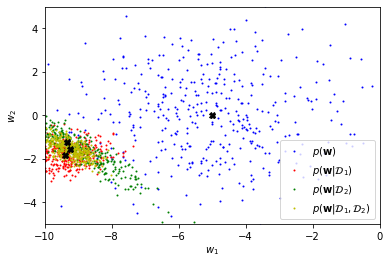

ValueError: mean must be 1 dimensional

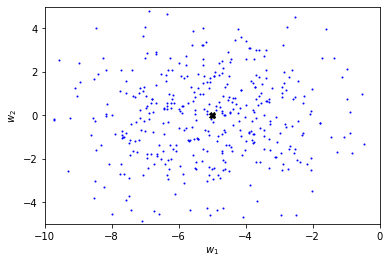

In [ ]:
# We combine datasets 1 and 2 by stacking the matrices / vectors
Data_1_2 = {'X': np.vstack((X_Data_1, X_Data_2)),
            'y': np.concatenate((y_Data_1, y_Data_2))}
# Calculate posterior parameters
posterior_par_1 = posterior_par(prior_par, Data_1, sigma_y)
posterior_par_2 = posterior_par(prior_par, Data_2, sigma_y)
posterior_par_1_2 = posterior_par(prior_par, Data_1_2, sigma_y)
# Visualise prior and posterior distributions
plt.figure(2)
plt.clf()
visualize_2D_gaussian(prior_par,
              label='$p(\mathbf{w})$',
              colour='b')
visualize_2D_gaussian(posterior_par_1,
              label='$p(\mathbf{w}|\mathcal{D}_1)$',
              colour='r')
visualize_2D_gaussian(posterior_par_2,
              label='$p(\mathbf{w}|\mathcal{D}_2)$',
              colour='g')
visualize_2D_gaussian(posterior_par_1_2,
              label='$p(\mathbf{w}|\mathcal{D}_1,\mathcal{D}_2)$',
              colour='y')
plt.legend()
plt.show()
# Here we construct an empty dataset
Data_nodat = {'X': np.empty([0, D]),
              'y': np.empty([0, 1])}
# The posterior for an empty dataset will be the prior
plt.figure(3)
plt.clf()
posterior_par_nodat = posterior_par(prior_par, Data_nodat, sigma_y)
visualize_2D_gaussian(prior_par,
              label='$p(\mathbf{w})$',
              colour='b')
visualize_2D_gaussian(posterior_par_nodat,
              label='$p(\mathbf{w}|\{\})$',
              colour='c')
plt.legend()
plt.show()